In [71]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("income.csv")
df.head

<bound method NDFrame.head of         Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000>

Text(0, 0.5, 'Income($)')

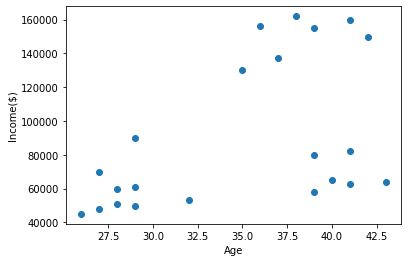

In [72]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [73]:
sse= []
k_range=range(1,len(df))
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 814746044.2545456,
 296500418.0952381,
 231967084.46190482,
 173633694.45000002,
 120800257.03333335,
 95133611.78333335,
 68133457.7,
 42000112.333333336,
 21833432.166666664,
 14291766.333333334,
 10125026.166666668,
 8125016.666666667,
 6125012.166666667,
 4125010.166666667,
 2625007.5,
 1500007.0,
 1000002.5,
 500000.5]

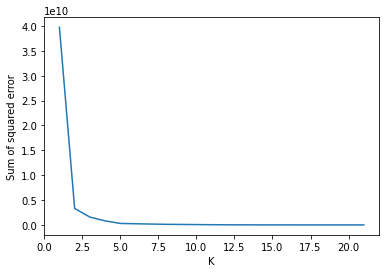

In [74]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [75]:
#model_creation

In [76]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])#predict point in which cluster
df['cluster']=y_predicted
df.head()
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

No handles with labels found to put in legend.


Text(0, 0.5, 'Income ($)')

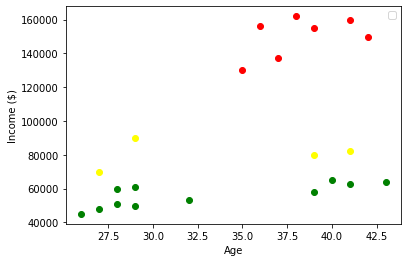

In [77]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='Red')
plt.scatter(df2['Age'],df2['Income($)'],color='Green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [78]:
#Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()
sca.fit(df[['Income($)']])
df['Income($)']=sca.transform(df[['Income($)']])
sca.fit(df[['Age']])
df['Age']=sca.transform(df[['Age']])

In [80]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df.head()
centroids=km.cluster_centers_
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

No handles with labels found to put in legend.


Text(0, 0.5, 'Income ($)')

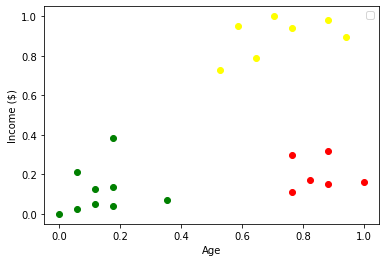

In [81]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='Red')
plt.scatter(df2['Age'],df2['Income($)'],color='Green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [58]:
#elbow point

In [59]:
sse= []
k_range=range(1,len(df))
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472496,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426,
 0.0838267986073564,
 0.06359040943557255,
 0.05566189393600452,
 0.03913672635392093,
 0.030426552928992826,
 0.02336003499387405,
 0.01641649105272562,
 0.011033819491365381,
 0.007513957485122411,
 0.0054551225809321684,
 0.003578916064498534,
 0.0017666294837796928]

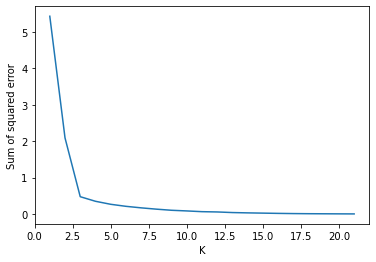

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [61]:
#Centroid

In [62]:
#centroids=km.cluster_centers_

No handles with labels found to put in legend.


Text(0, 0.5, 'Income ($)')

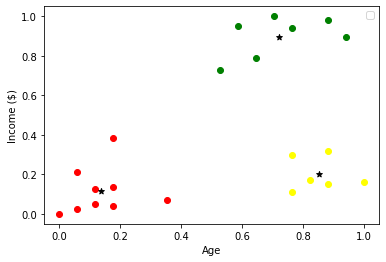

In [63]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='Red')
plt.scatter(df2['Age'],df2['Income($)'],color='Green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')
plt.scatter(centroids[:,0],centroids[:,1],color='Black',marker='*')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income ($)')